<a href="https://colab.research.google.com/github/BlocklyS/smartEDA/blob/main/smartEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# this line of code prints the version of R being used (in colab change runtime to R kernel)
print(R.version.string)

[1] "R version 4.3.2 (2023-10-31)"


In [ ]:
install.packages ("SmartEDA")

In [ ]:
#load libraries
library(SmartEDA)
library(tidyverse)

In [8]:
# Read file on a given URL
# Use read.csv function to parse the data and store in a variable named 'world_data'
world_data <- read.csv("https://raw.githubusercontent.com/BlocklyS/smartEDA/main/world-data-2023.csv") # GitHub Gist table


In [ ]:
class(world_data) #check the class of the object

In [ ]:
# Display the first few rows of a data frame (snapshot)
head(world_data,5)
# Display the last few rows of a data frame
tail(world_data,5)

In [ ]:
# give a concise representation of the R object 'dataframe' (names of the columns, the type of data in each column..)
glimpse(world_data)

--  Transform the excess of character columns and clear format symbols

In [12]:
# Identifying character columns
char_cols <- sapply(world_data, is.character)

In [13]:
# Exclude certain columns from transformation
exclude_cols <- c("Country", "Abbreviation", "Capital.Major.City", "Currency.Code", "Largest.city", "Official.language")
char_cols[exclude_cols] <- FALSE

In [15]:
# Convert remaining character columns to numeric, removing any special characters
clean_data <- world_data
char_columns_to_convert <- names(clean_data)[char_cols]


clean_data[char_columns_to_convert] <- lapply(clean_data[char_columns_to_convert], function(x) {
    x <- gsub("[%,\\$]", "",x) # Remove special characters
    suppressWarnings(as.numeric(x)) # Convert to numeric and suppress warnings
})

In [ ]:
str(clean_data)

# Automated Exploratory Data Analysis with SmartEDA package



- Descriptive Statistics Functions


> ExpData(), ExpNumStat(), ExpCatStat()



- Descriptive Statistics Functions


> ExpData(), ExpNumStat(), ExpCatStat()






In [ ]:
# Overview of the data - Type = 1: overall data summary
ExpData(data=clean_data,type=1) # Function to generate data dictionary of a dataframe
# give the dimensions of the dataset,variable names, overall missing summary and data types of each variables.


In [ ]:
# Structure of the data - Type = 2: variable level summary
ExpData(data=clean_data,type=2)

In [ ]:
# Metadata Information with additional statistics like mean, median and variance
ExpData(data=clean_data,type=2, fun = c("mean", "median", "var"))

In [ ]:
# ExpNumStat provide summary statistics for all numerical variable
#case 1: target variable is not defined- group by All

ExpNumStat(clean_data,by="A",gp=NULL,Qnt=NULL,MesofShape=2, Outlier=FALSE,round=2,Nlim=10)


In [ ]:
# This function automatically scans through each variable and creates densityplot, scatterplot and boxplot for continuous variable using ggplot2 functions

ExpNumViz( clean_data,type=2, nlim=3,col= 'green',  scatter=TRUE, gtitle="scatter plot:",theme="Default", Page=c(2,2),sample=6) # you can remove sample limit



In [ ]:
options(width = 150) # customized statistics with ExpCustomStat
ExpCustomStat(clean_data,Cvar= "Country",gpby=TRUE, filt=  "Life.expectancy <60") #filtering data

In [ ]:
# Numeric variable summary
ExpCustomStat(clean_data,Nvar=c("Urban_population","GDP","Out.of.pocket.health.expenditure","Unemployment.rate"),stat = c('Count','mean','sum','var','min','max'))

In [ ]:
ExpCustomStat(clean_data,Nvar=c("GDP","Minimum.wage"),stat = c('min','p0.25','median','p0.75','max'))


In [ ]:
ExpCustomStat(clean_data,Nvar=c("Urban_population","GDP","Out.of.pocket.health.expenditure","Unemployment.rate"),stat = c('min','p0.25','median','p0.75','max'))



In [ ]:
## graphical representation of numeric features (Density plot univariate)
# Note: Variable excluded (if unique value of variable which is less than or eaual to 10 [nlim=10])
plot1 <- ExpNumViz(clean_data,target=NULL,nlim=10,Page=c(2,2),sample=4)
plot1[[1]]


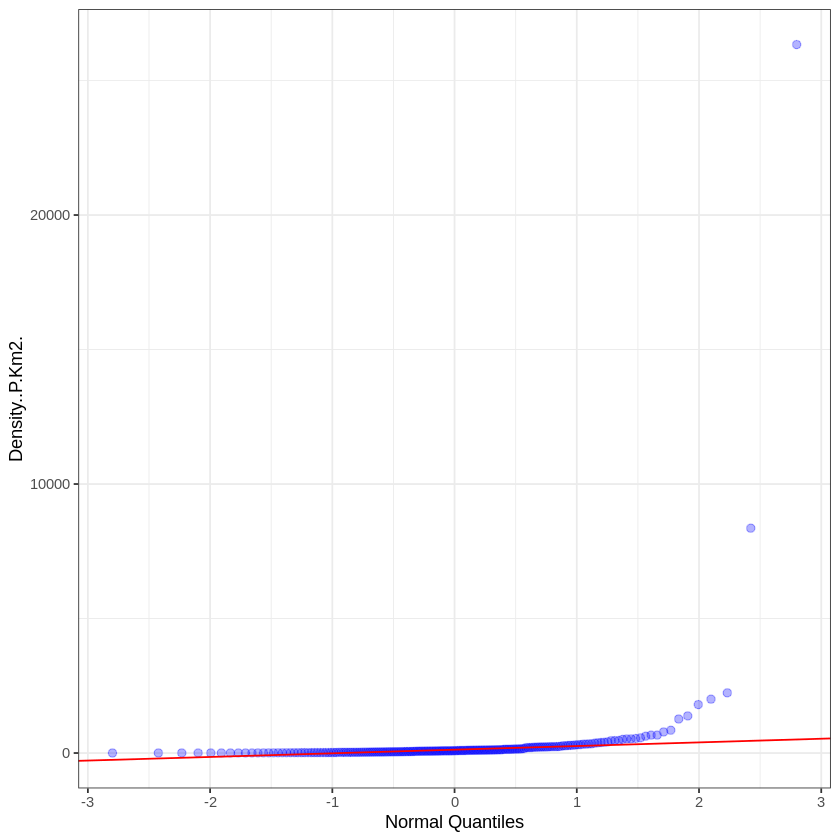

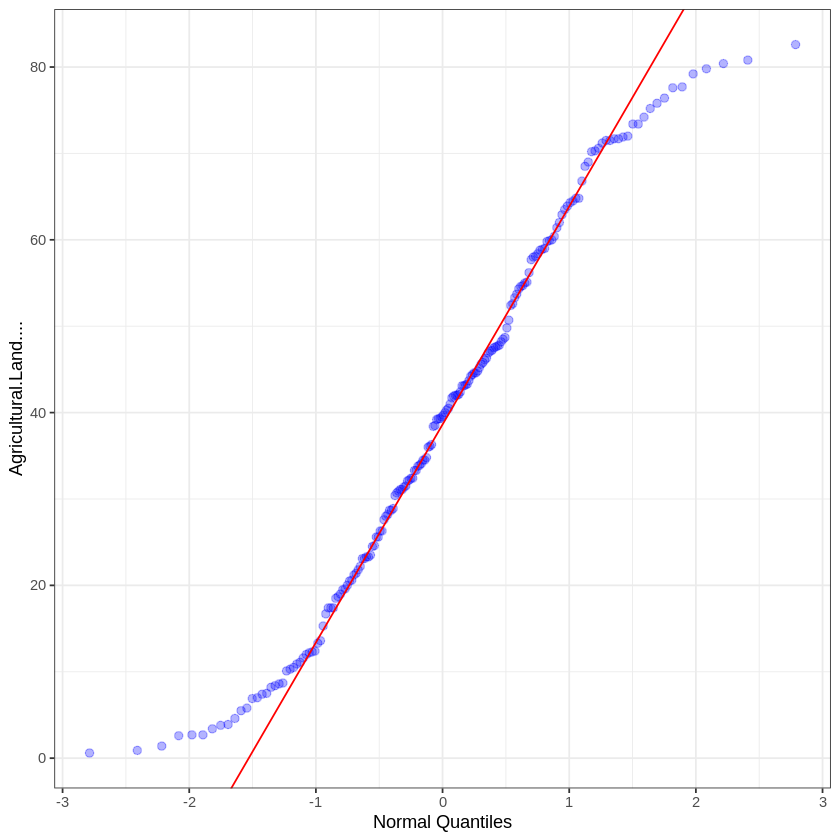

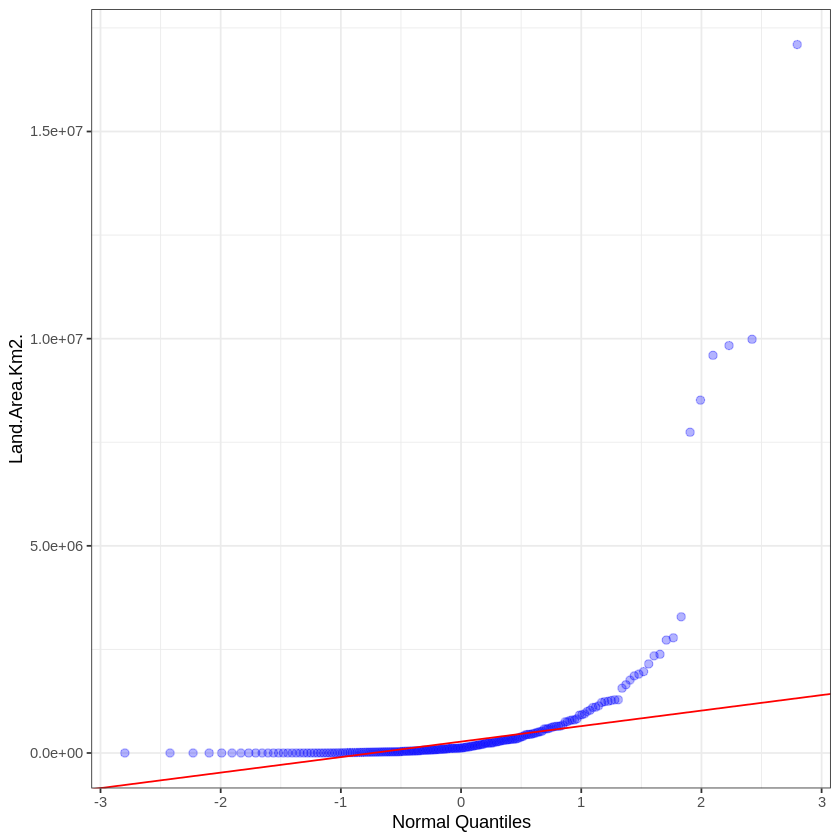

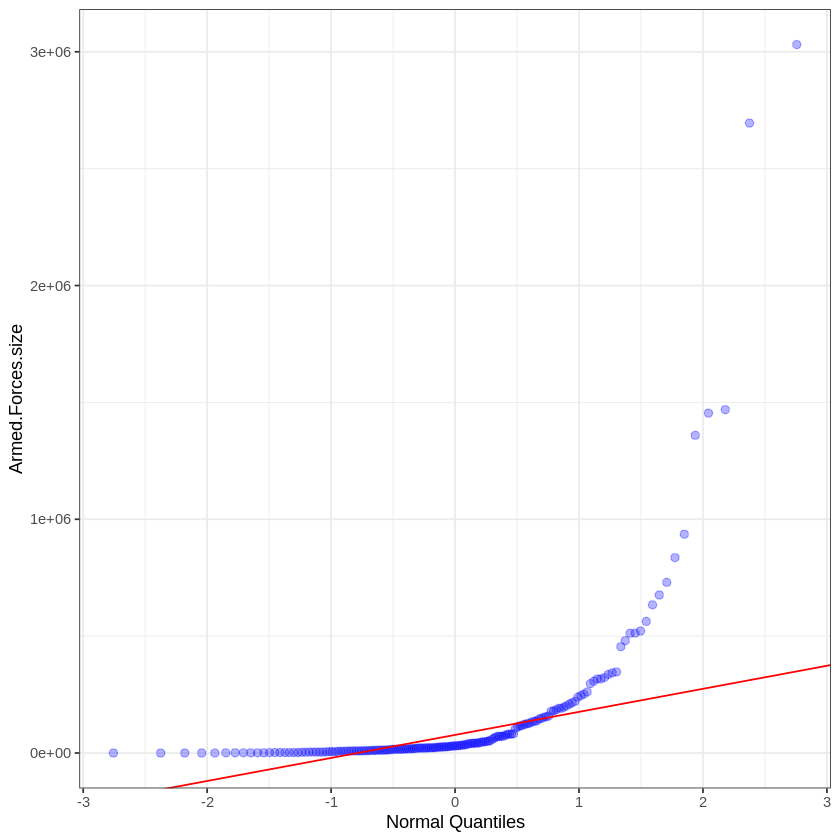

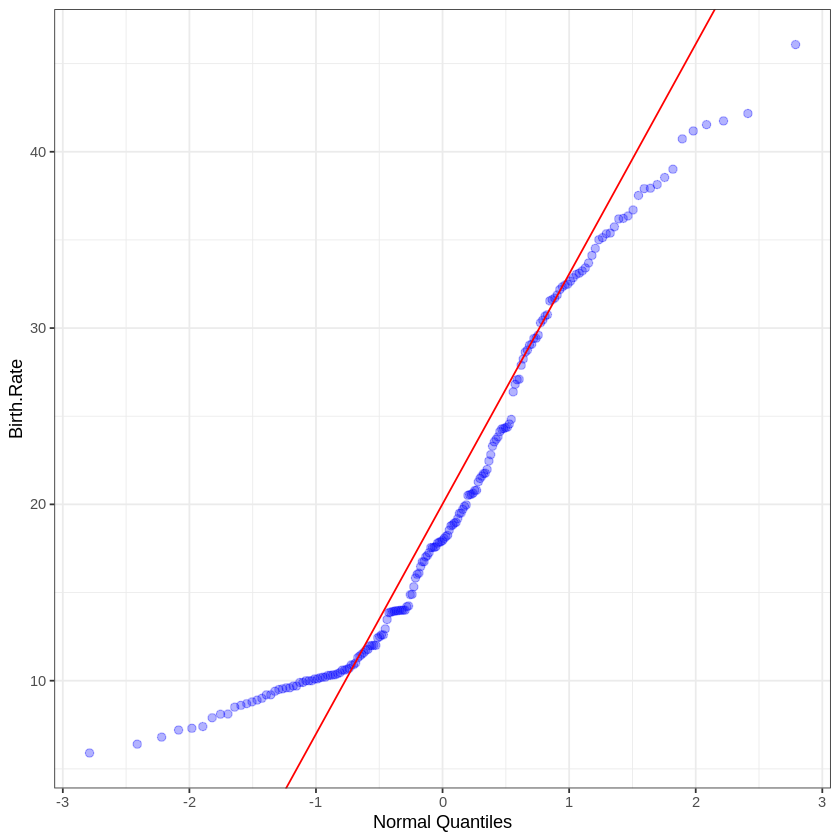

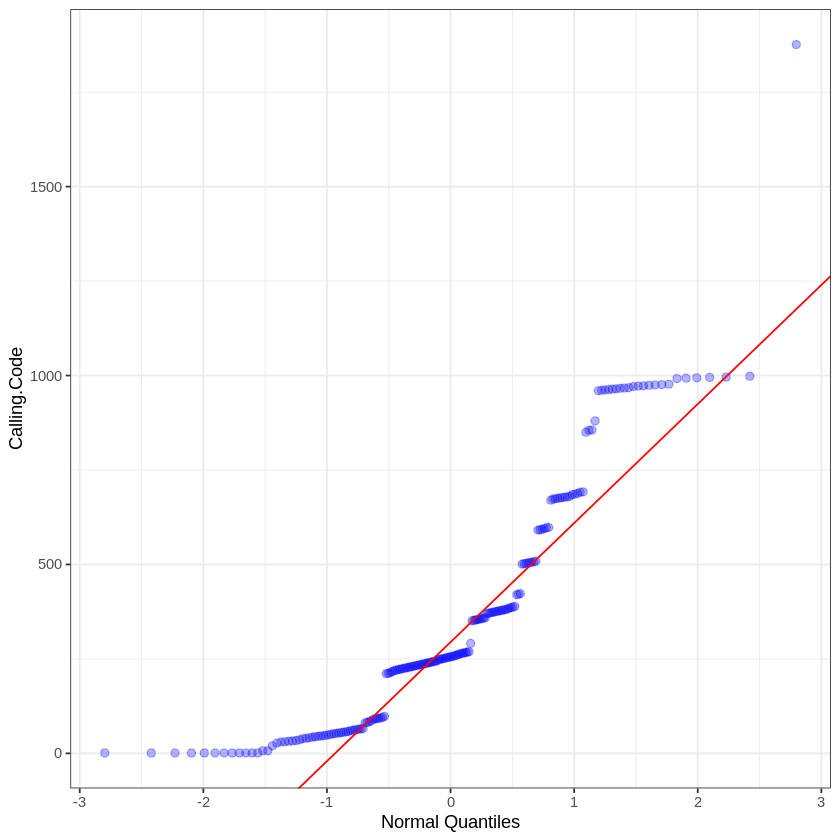

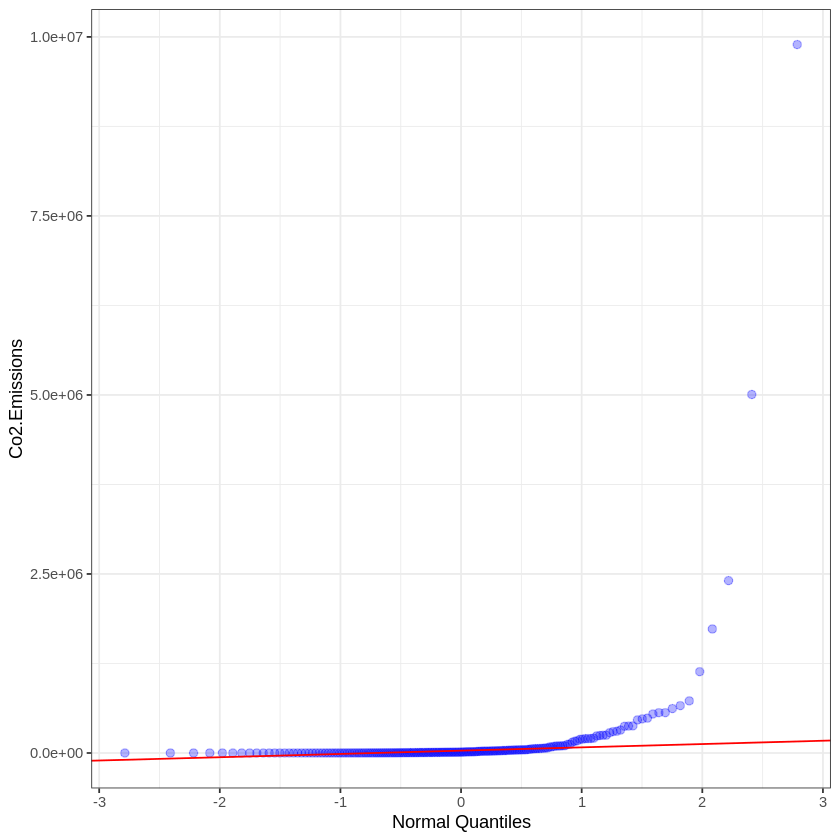

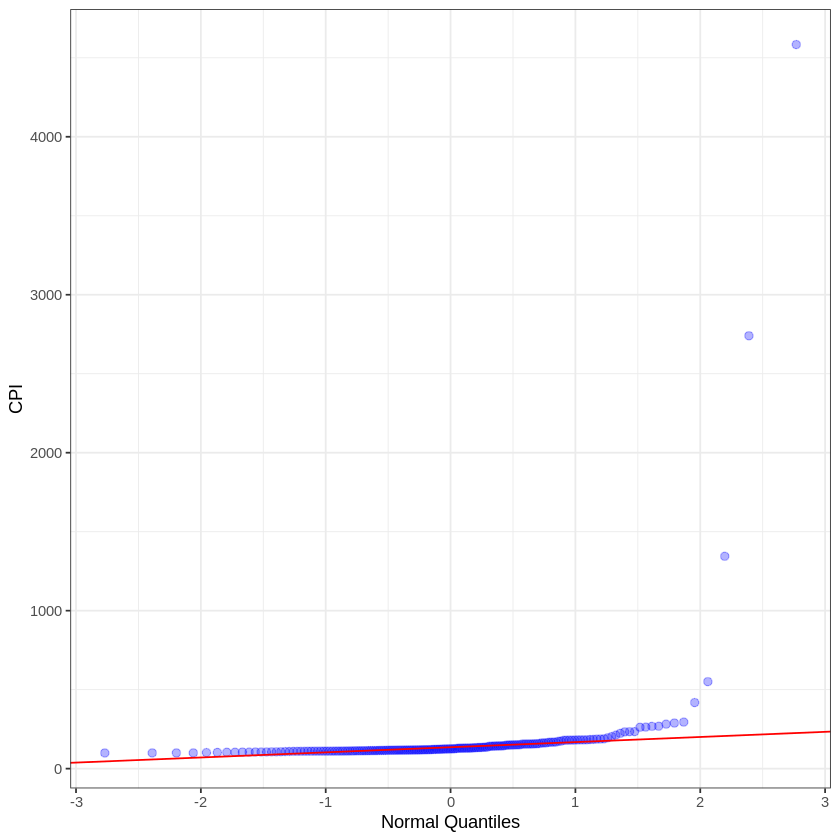

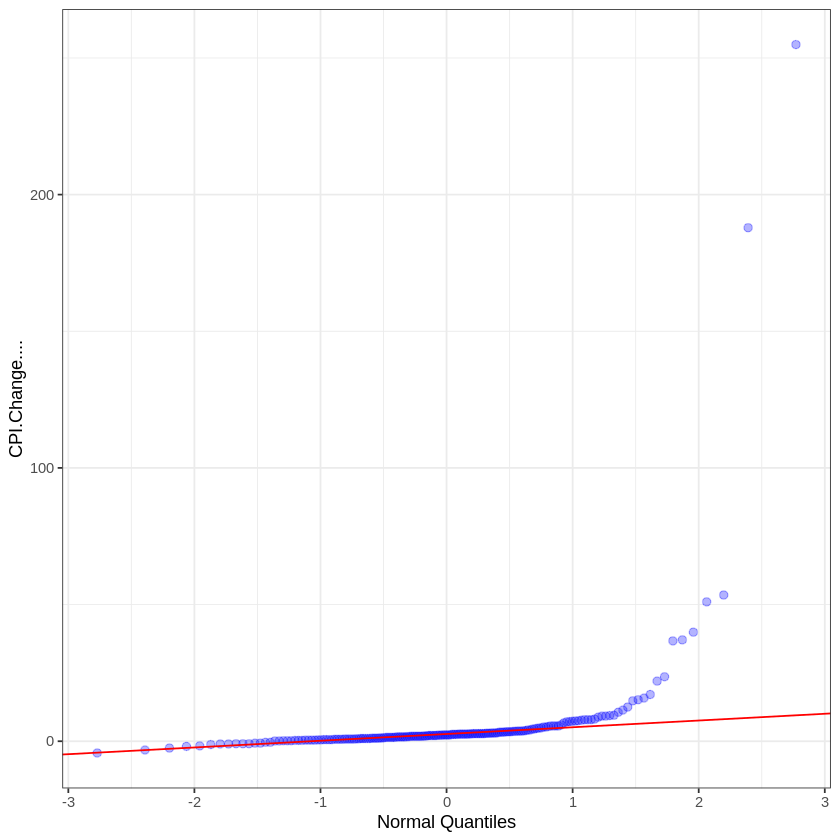

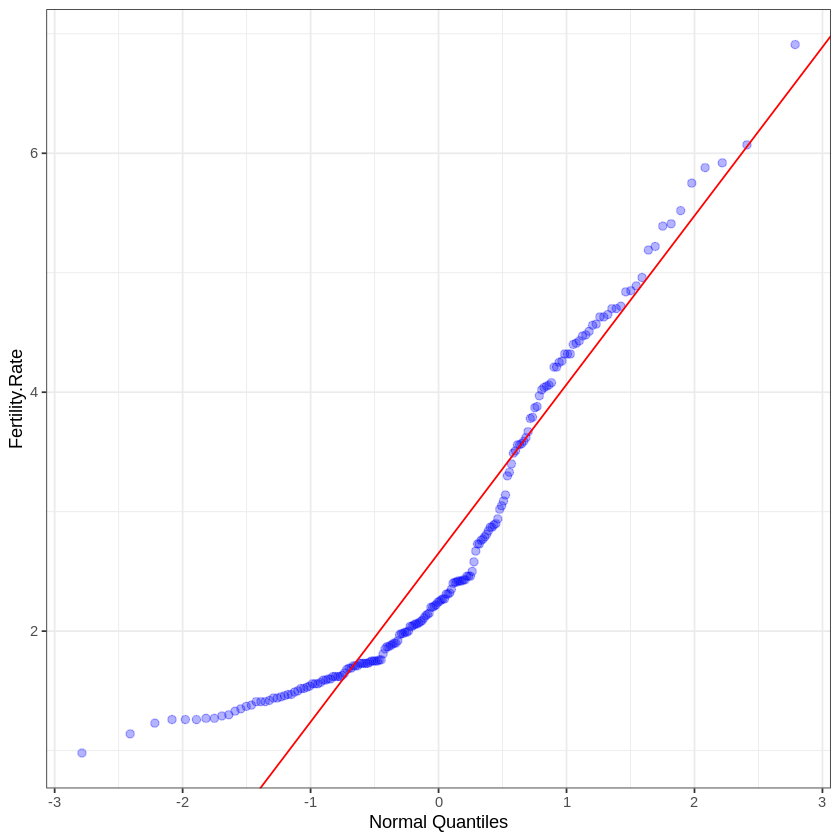

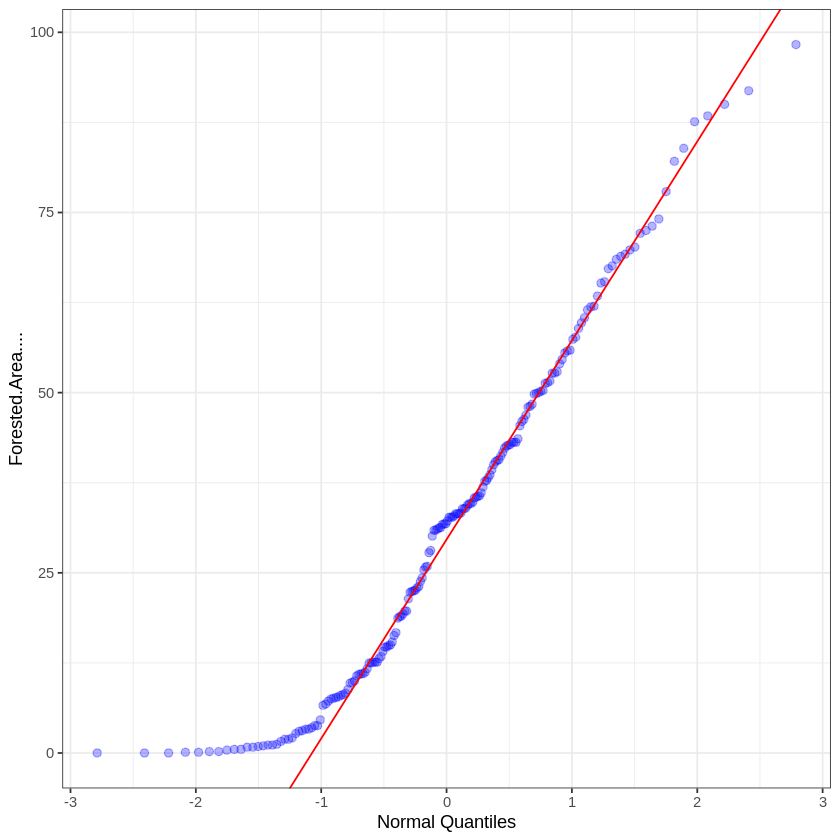

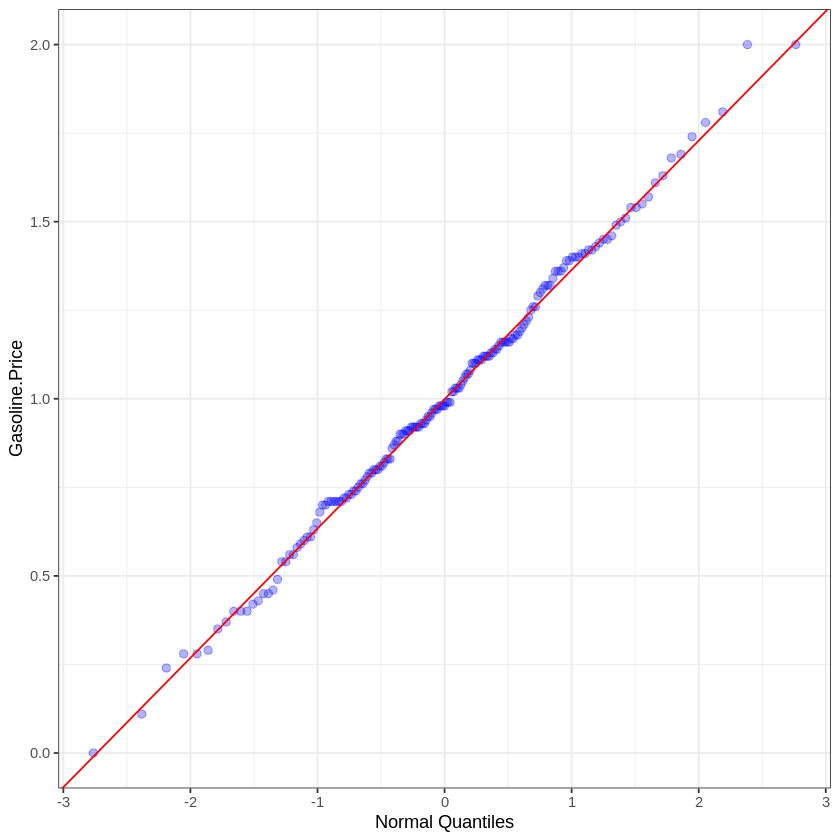

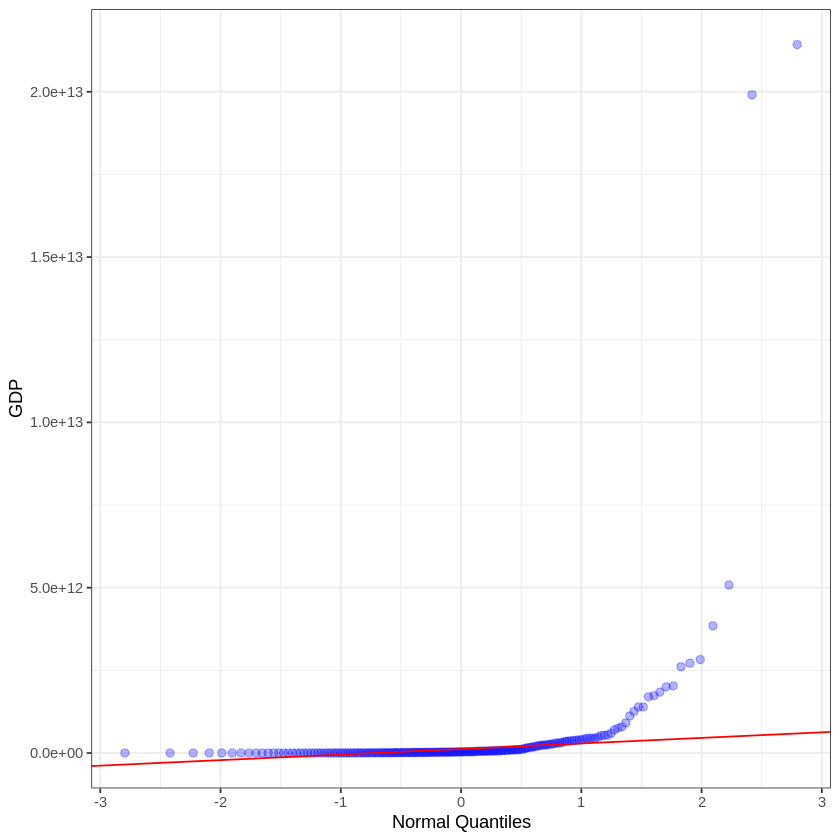

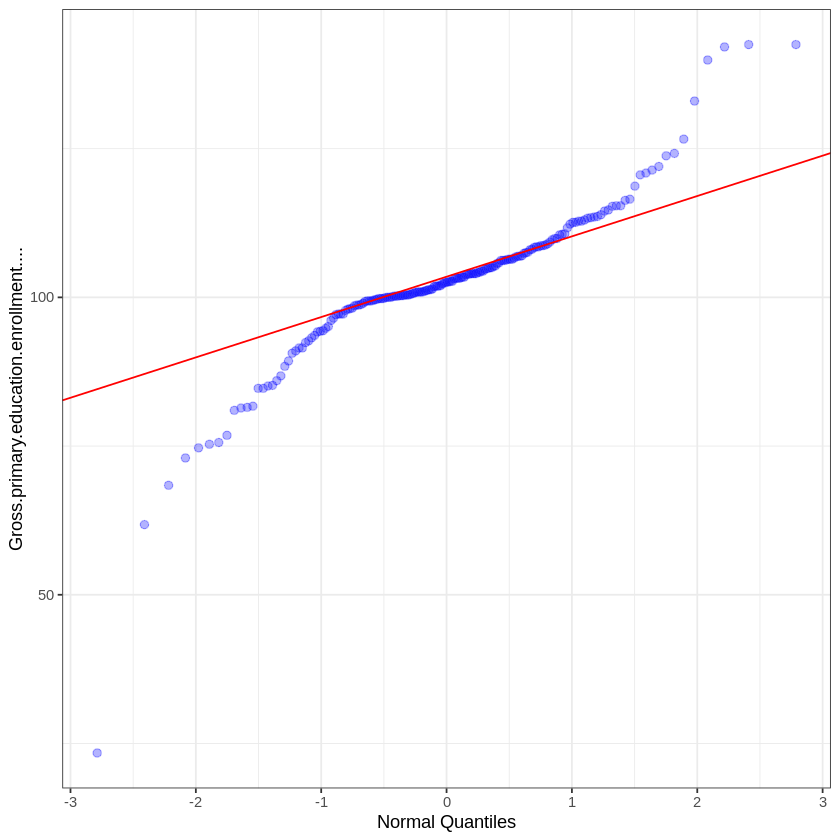

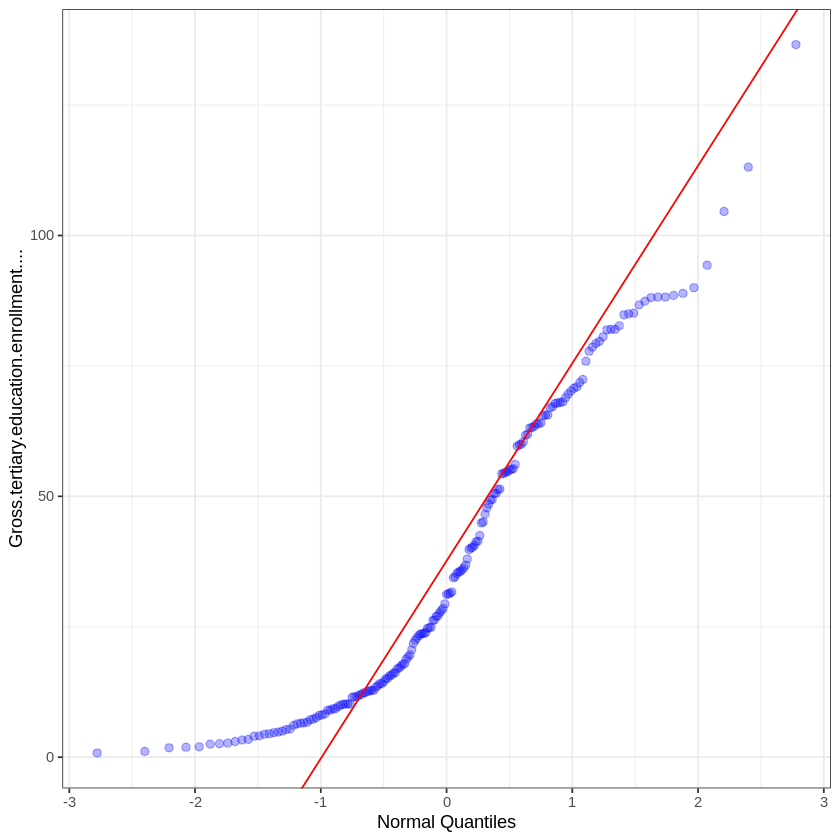

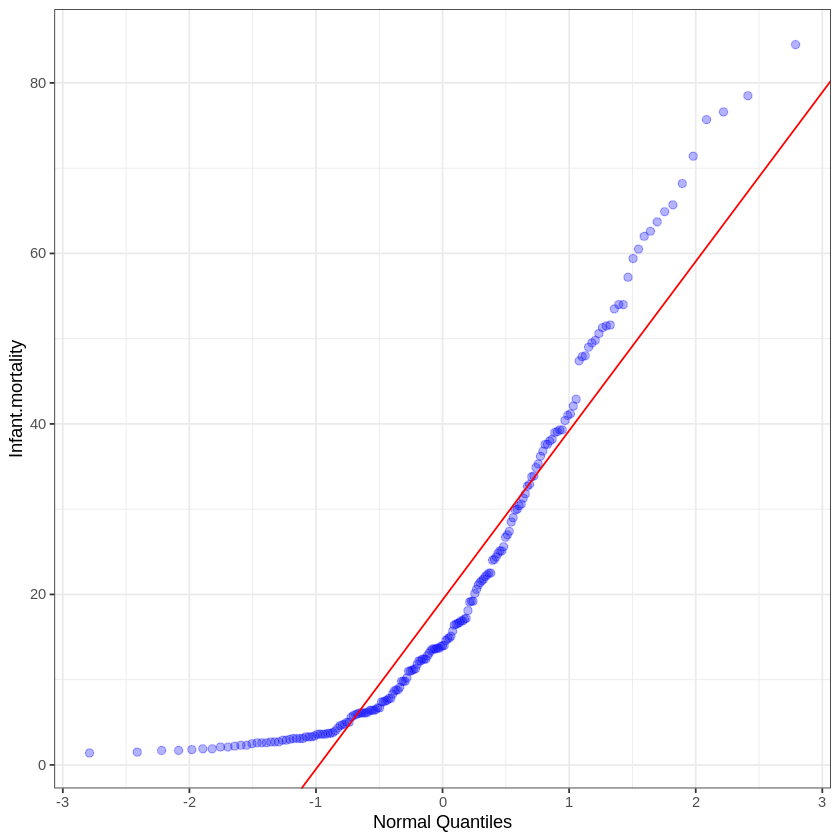

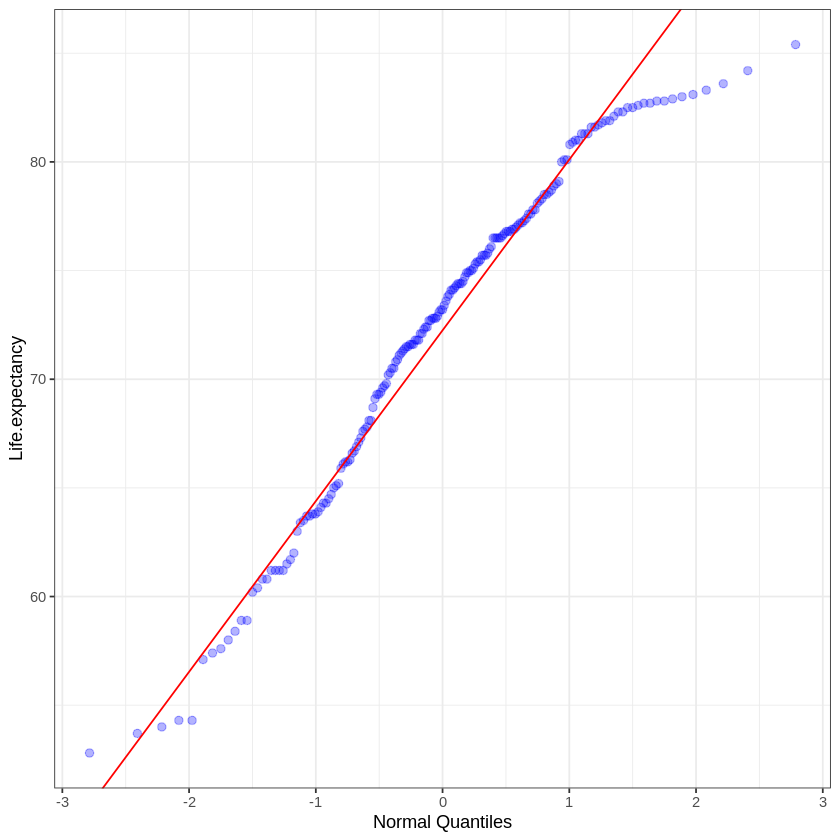

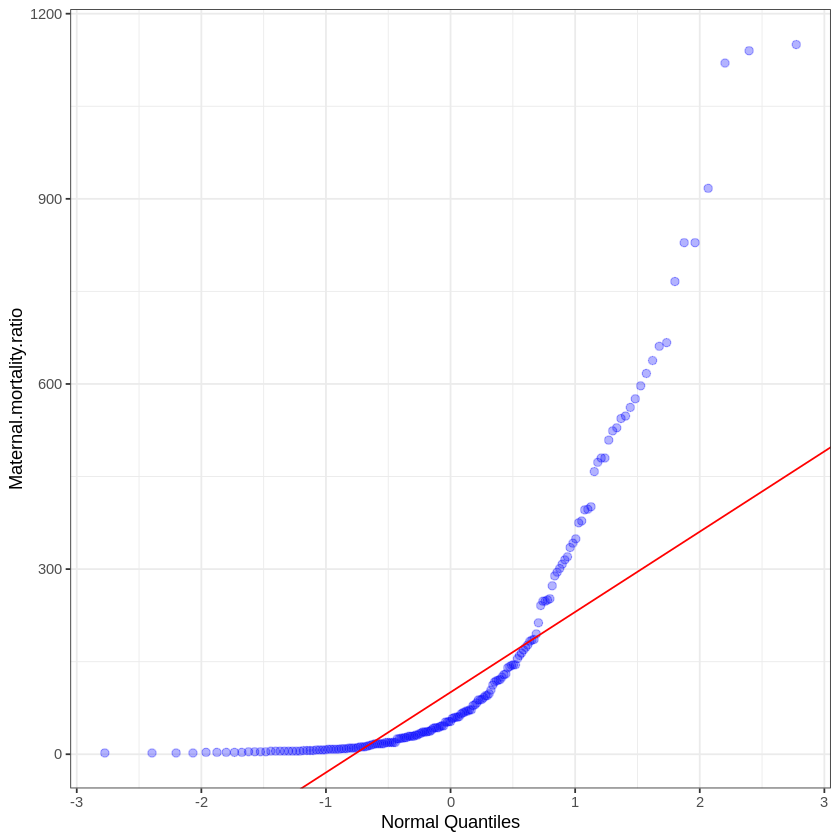

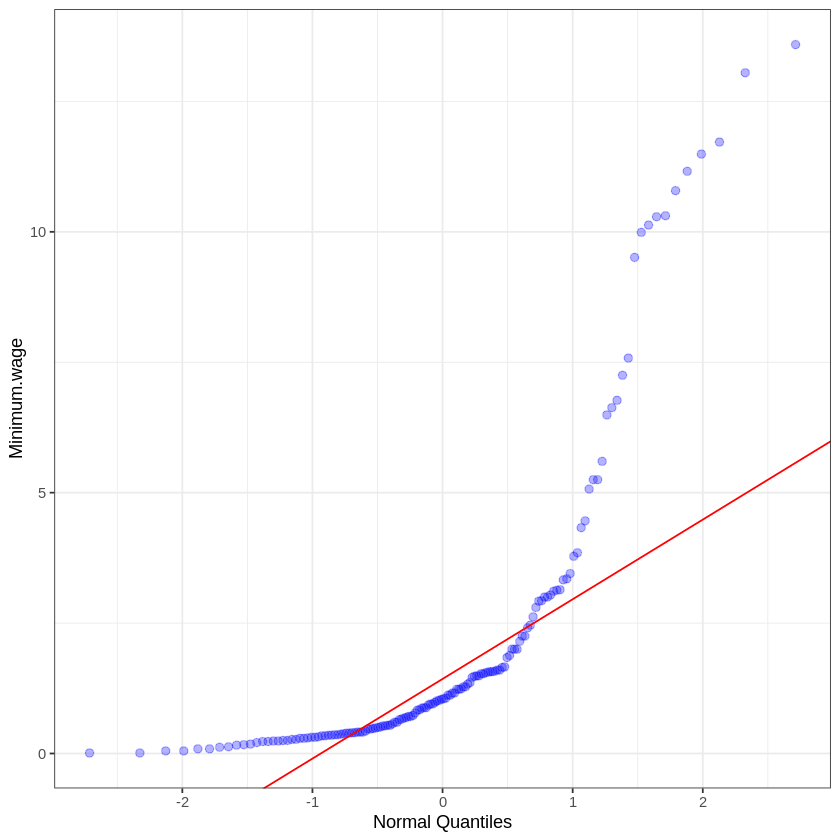

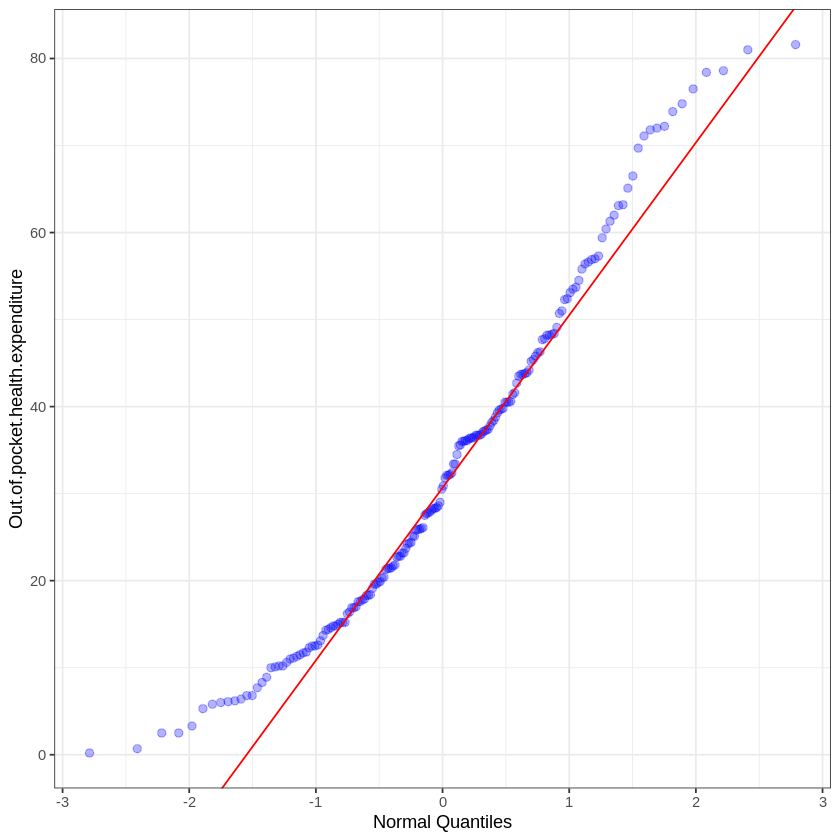

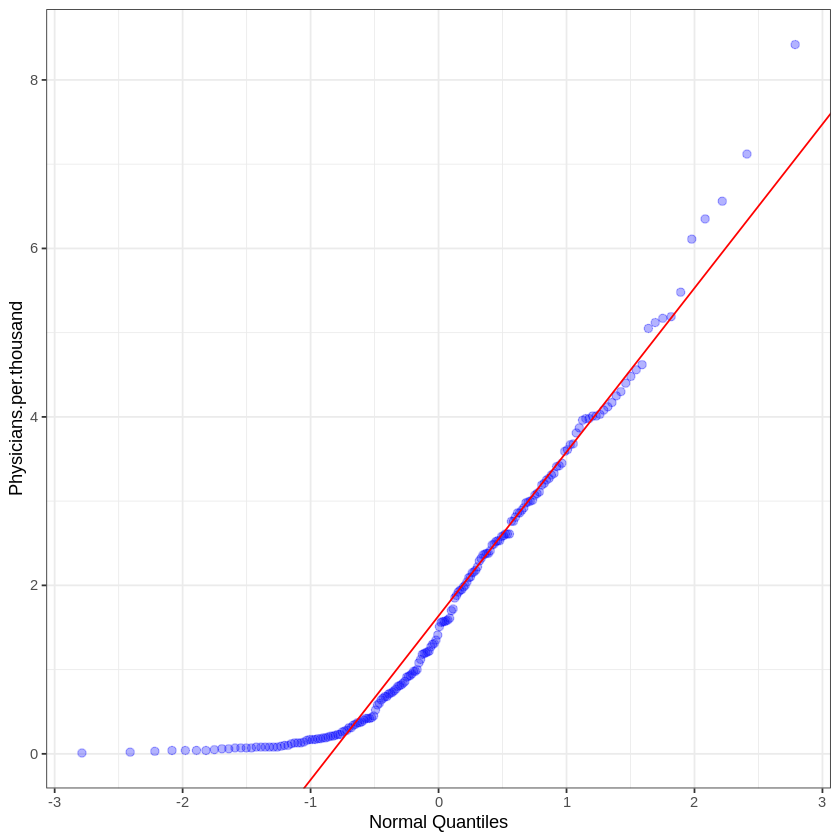

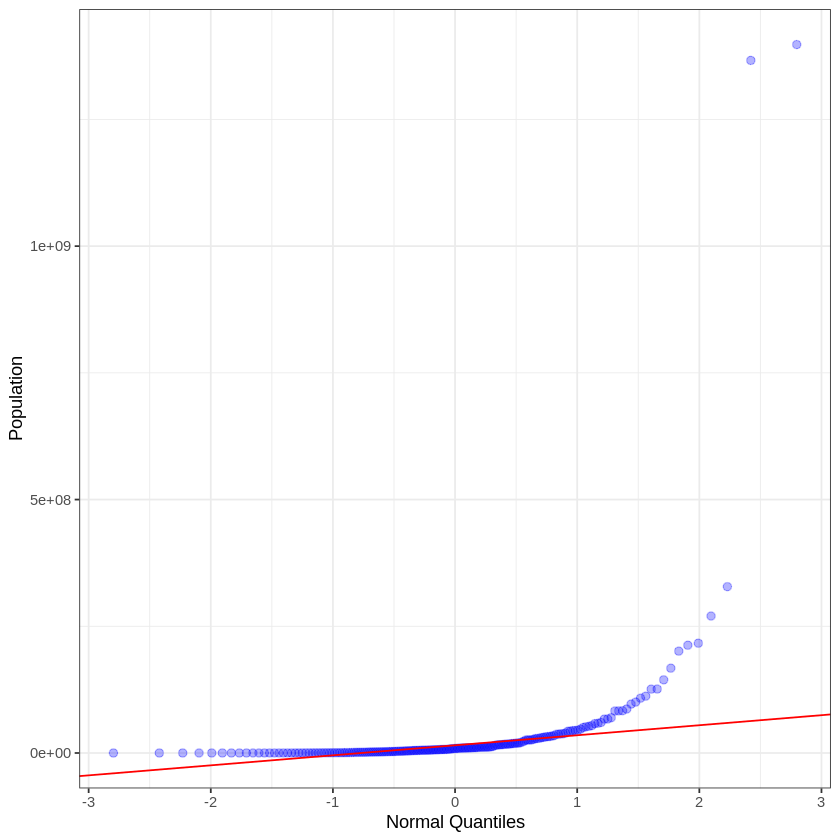

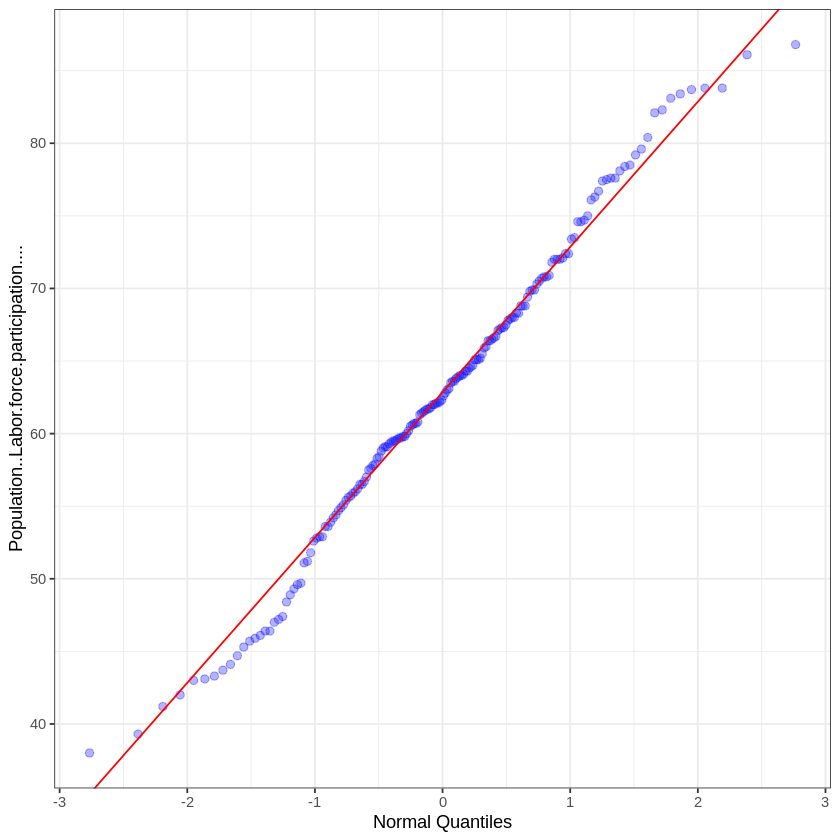

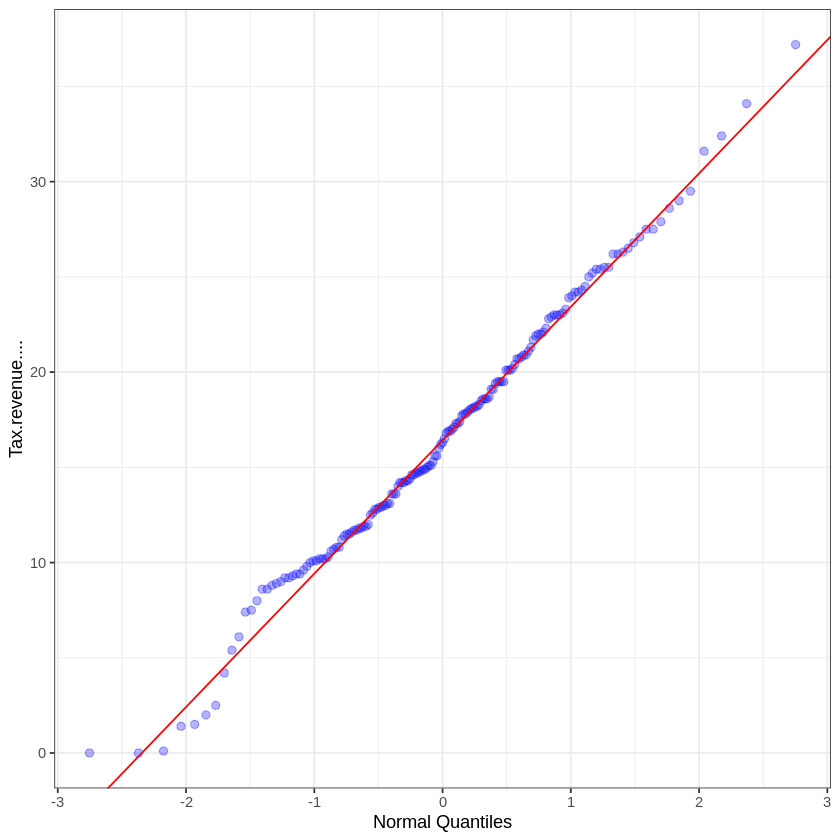

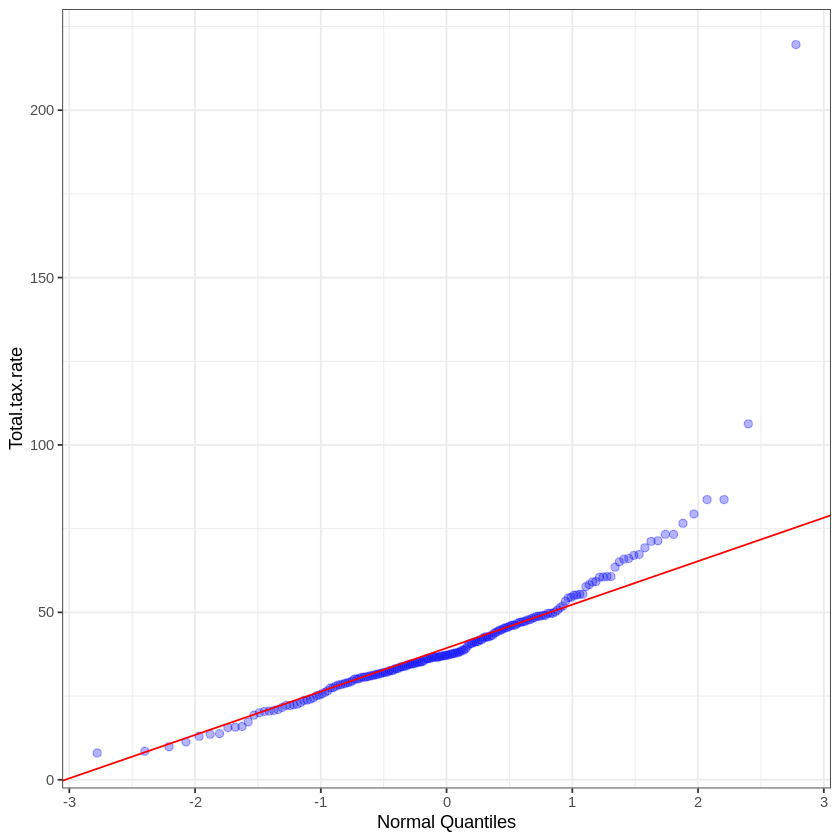

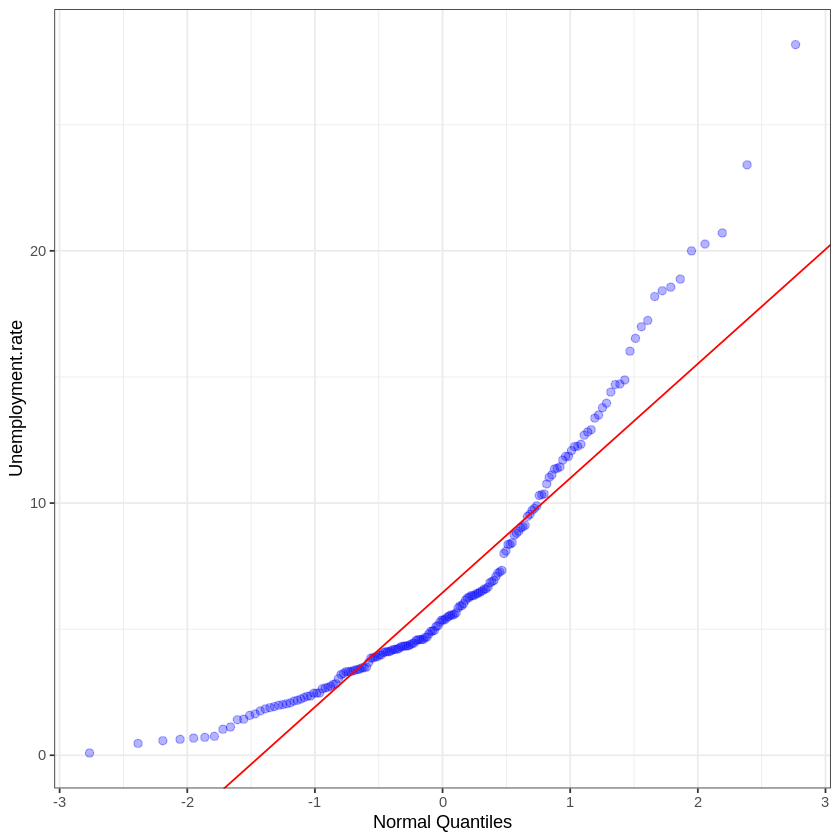

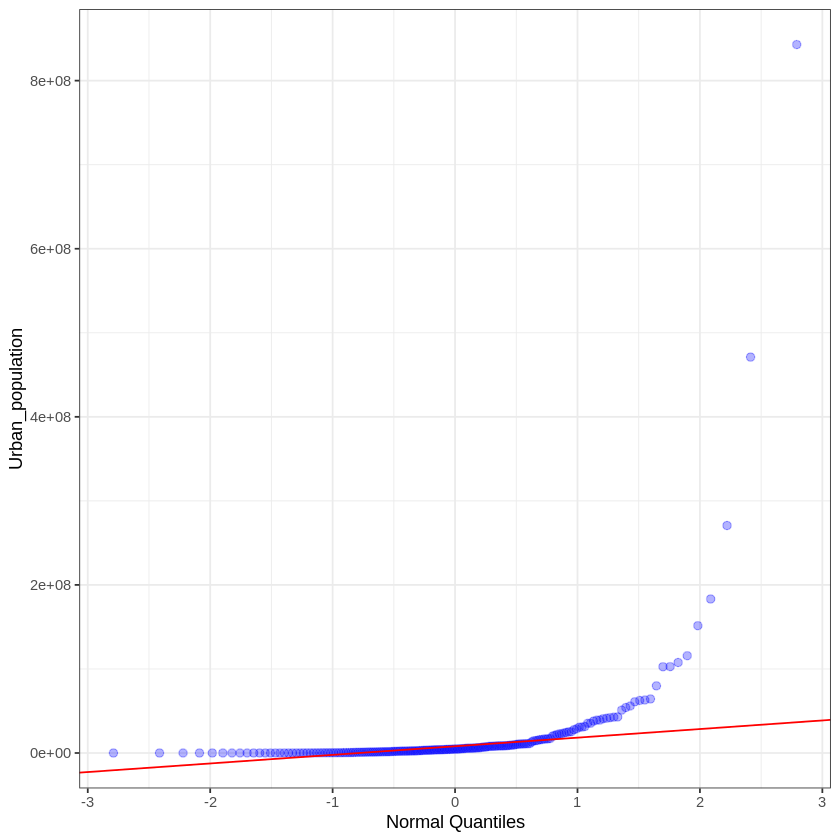

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]

[[12]]

[[13]]

[[14]]

[[15]]

[[16]]

[[17]]

[[18]]

[[19]]

[[20]]

[[21]]

[[22]]

[[23]]

[[24]]

[[25]]

[[26]]

[[27]]

[[28]]

[[29]]


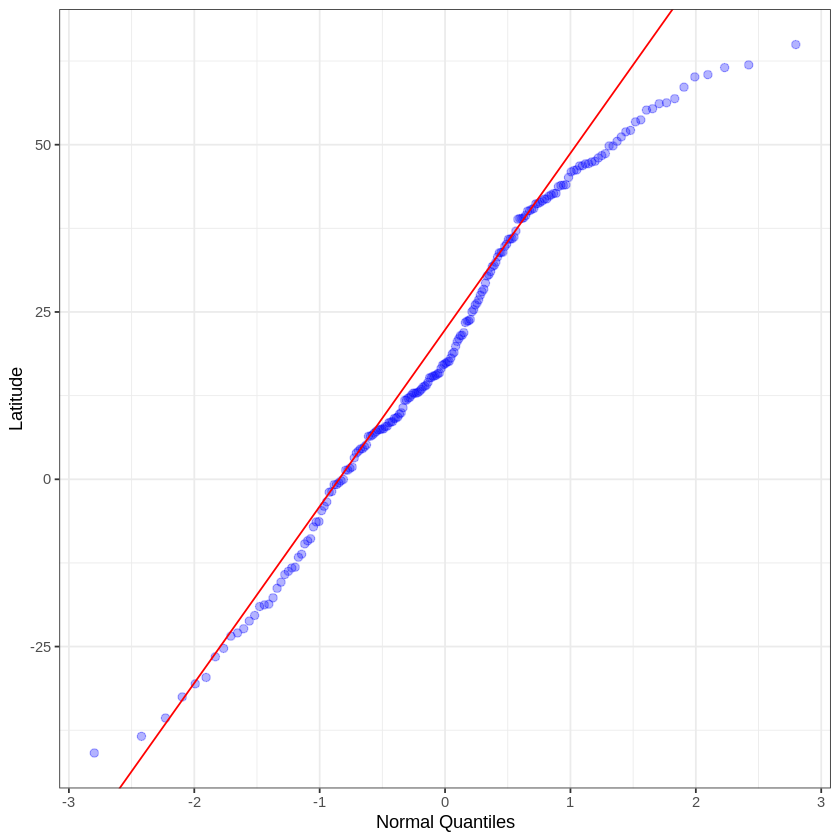

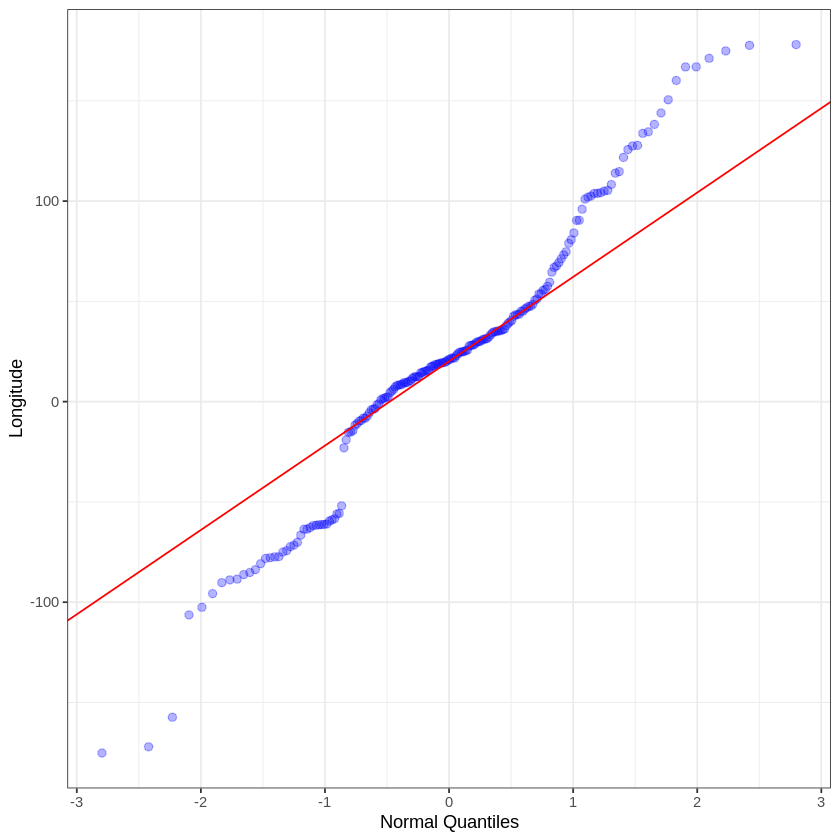

In [41]:
 ExpOutQQ(clean_data) #  ExpOutQQ function automatically scans through each variable and creates normal QQ plot

In [ ]:
getwd()

[1] "/content"

In [ ]:
 ExpReport(clean_data,Target=NULL,label="Country",theme="Default",  op_file="Smart_Eda_Report.html", op_dir="/content", sc=NULL, sn=8)

#ExpReport functions create an  EDA report in HTML

In [ ]:
?ExpReport


In [ ]:
 ExpReport(clean_data,Target=NULL,label="Country",theme="Default",  op_file="Smarte_EDA_Report.rdm", op_dir="/content", sc=NULL, sn=8)